In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
#from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL


In [2]:
from book_funcs import category_cleaner,df_cleaner, category_compliter, zero_droper

In [52]:
!pip install pandas_profiling
!pip install wordcloud

^C
^C


In [3]:
df = pd.read_csv(r"C:\Users\yotam\Desktop\naya\Preprocessed_data.csv")

In [117]:
df_isbn = df['isbn']#.unique()

In [118]:
df_isbn = df['isbn']
num_dict = {}
for i,j in enumerate(df_isbn.unique()):
    num_dict[j]=i
df['isbn_num'] = df['isbn'].apply(lambda txt: num_dict[txt])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031175 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

In [8]:
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


6172category, 2254 with 1 book only

In [4]:
df = category_cleaner(df)
df = df_cleaner(df)
df = category_compliter(df)

The original data frame shape:	(1031175, 19)
The data frame shape after bookk filtering:	(629588, 19)
The new data frame shape:	(581111, 19)


C:\Users\yotam\Desktop\naya\books_recom_sys\book_funcs.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_author9_relevant_two_options['pred_Category'] = df_author9_relevant_two_options['Category'].apply(


In [7]:
len(df.groupby(['Category'])['Category'].count())

660

In [21]:
df_category =  pd.DataFrame(df['Category'].unique())

In [22]:
len(df_category)

660

In [8]:
!pip install sentence_transformers

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 86.0/86.0 kB 210.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.2/1.2 MB 88.7 kB/s eta 0:00:00
     ------------------------------------- 977.6/977.6 kB 60.7 kB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=c659c7006d5775e6e1e1336eed6747327fa50685de2f85eab8408403785172bf
  Stored in directory: c:\users\yotam\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [12]:
from sentence_transformers import SentenceTransformer
# Create a SentenceTransformer model (BERT-based)
#model = SentenceTransformer("bert-base-nli-mean-tokens")
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Encode category names into embeddings
category_embeddings = model.encode(df_category, show_progress_bar=True)

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

In [15]:
len(category_embeddings)

660

In [18]:
df_category['Embedding'] = 0


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [16]:
for i in range(len(df_category)):
    df.at[i, 'Embedding'] = embedding[i].tolist()

NameError: name 'embedding' is not defined

In [24]:
df_category['Embedding'] = category_embeddings.tolist()

In [28]:

for i in range(len(category_embeddings[0])):
    df_category[f'embedig{i}'] = df_category['Embedding'].apply(lambda arr: arr[i])


C:\Users\yotam\AppData\Local\Temp\ipykernel_16104\2506899259.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_category[f'embedig{i}'] = df_category['Embedding'].apply(lambda arr: arr[i])
C:\Users\yotam\AppData\Local\Temp\ipykernel_16104\2506899259.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_category[f'embedig{i}'] = df_category['Embedding'].apply(lambda arr: arr[i])
C:\Users\yotam\AppData\Local\Temp\ipykernel_16104\2506899259.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result o

In [30]:
df_category.to_csv('category_embedding')

In [9]:
df.groupby(['Category'])['Category'].count()[df.groupby(['Category'])['Category'].count()>1000].sort_values(ascending=False)

Category
fiction                              302038
9                                    176620
juvenile nonfiction                   24272
biography & autobiography             13666
humor                                  6257
science                                3316
history                                3190
self-help                              2647
religion                               2188
body, mind & spirit                    2116
family & relationships                 2088
crime                                  1948
art                                    1839
business & economics                   1820
american wit and humor, pictorial      1749
literary                               1552
character                              1327
health & fitness                       1299
psychology                             1278
travel                                 1074
drama                                  1001
Name: Category, dtype: int64

# aggragting by books

In [36]:
df_books = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first','user_id':'count','age':'mean','rating':'mean','publisher':'first','Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first', 'Summary':'first',
                                   'Language':'first','city':pd.Series.mode,'state':pd.Series.mode, 'country':pd.Series.mode})

In [37]:
df_books.groupby(['Category'])['Category'].count()[df_books.groupby(['Category'])['Category'].count()>1000].sort_values(ascending=False)

Category
9                                    131469
fiction                               54988
juvenile nonfiction                   13278
biography & autobiography              5441
science                                4260
history                                3553
religion                               3540
art                                    3390
business & economics                   2278
humor                                  1809
family & relationships                 1739
health & fitness                       1727
cooking                                1725
body, mind & spirit                    1716
american wit and humor, pictorial      1568
computers                              1439
literary                               1427
psychology                             1318
poetry                                 1227
travel                                 1117
self-help                              1114
Name: Category, dtype: int64

books without a category or summry

In [42]:
df_books9 = df_books[df_books['Category']=='9']

In [43]:
df_books9.sort_values(by = 'user_id', ascending=False).head(2)

,book_title,book_author,year_of_publication,user_id,age,rating,publisher,Category,img_s,img_m,img_l,Summary,Language,city,state,country
isbn,,,,,,,,,,,,,,,,
0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,1295,35.654957,4.468726,"Little, Brown",9,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,9,9,toronto,california,usa
0671027360,Angels & Demons,Dan Brown,2001.0,586,36.980104,3.718430,Pocket Star,9,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,9,9,"[atlanta, minneapolis]",california,usa


# group by author

In [130]:
df_author = df_books.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'sum','publisher':'count'})
df_author['freq_Category'] = df_books.groupby('book_author')['Category'].agg(lambda x: x.mode()[0] if (x.mode()[0]!='9') or (len(x.mode())==1) else x.mode()[1])
df_author['num_topic'] = df_author['Category'].apply(lambda lst: 1 if type(lst)==str else len(lst))
df_author['topic9'] = df_author['Category'].apply(lambda lst: 1 if '9' in lst else 0)

In [47]:
df_author.sort_values(by = 'num_topic', ascending=False)

,Category,user_id,freq_Category,num_topic,topic9
book_author,,,,,
Seymour Reit,"[9, airplanes, alaska, arm, character, dental ...",9,airplanes,9,1
Rose Greydanus,"[9, american wit and humor, pictorial, animals...",9,"american wit and humor, pictorial",9,1
Sharon Peters,"[9, dentistry, easy reader, ghost stories, juv...",7,dentistry,7,1
Autumn Stephens,"[9, art, history, humor, reference, science, w...",7,art,7,1
Kjartan Poskitt,"[9, arithmetic, astronomy, mathematics, physic...",7,arithmetic,7,1
...,...,...,...,...,...
HANS KUNG,9,1,9,1,1
HANS CHRISTIAN ANDERSEN,9,2,9,1,1
HANNAH MACDONALD,fiction,1,fiction,1,0


In [49]:
len(df_author9)

56890

In [50]:
df_author9 = df_author[df_author['topic9']==1]
df_author9_relevant = df_author9[df_author9['num_topic']>1]
df_author9_relevant_two_options = df_author9_relevant[df_author9_relevant['num_topic']==2]
df_author9_relevant_two_options['pred_Category'] = df_author9_relevant_two_options['Category'].apply(lambda lst: lst[-1])

In [65]:
len(df_author9_relevant[df_author9_relevant['num_topic']==2])

7253

 הצלחתי לשחזר כ 10000 ספרים

# real eda

In [214]:
len(df[df['rating']==0])

647323

In [215]:
len(df[df['rating']>0])

383852

### books

In [13]:
df_books_new = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books_new['sum_rating'] = df_books_new['rating']*df_books_new['user_id']

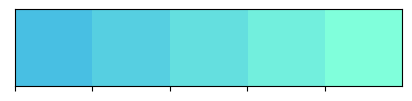

In [7]:
custom_colors = ['#48bfe3','#56cfe1','#64dfdf','#72efdd','#80ffdb']
customPalette = sns.color_palette(custom_colors)
sns.palplot(sns.color_palette(custom_colors),size=1)

sns.set_context("poster")

## with all the reviews

 יש פער משמעותי בהתפלגות הציוניום כשכוללים וכשלא כוללים דירוגים אפסיים

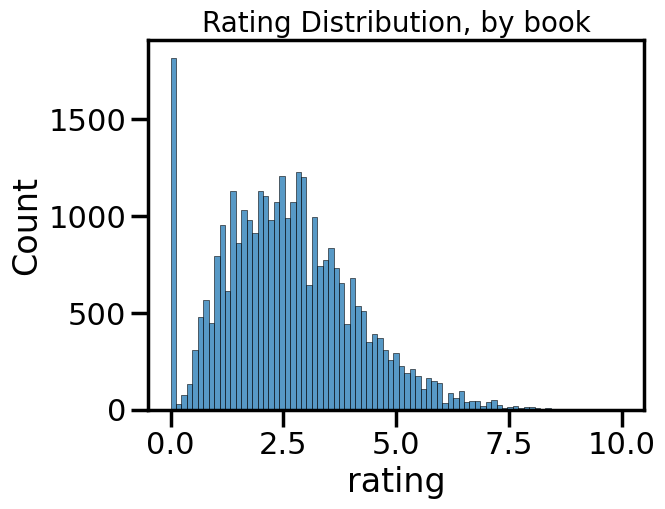

In [195]:
plt.figure()
sns.histplot(x='rating',data=df_books_new,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

## without 0 reviews:

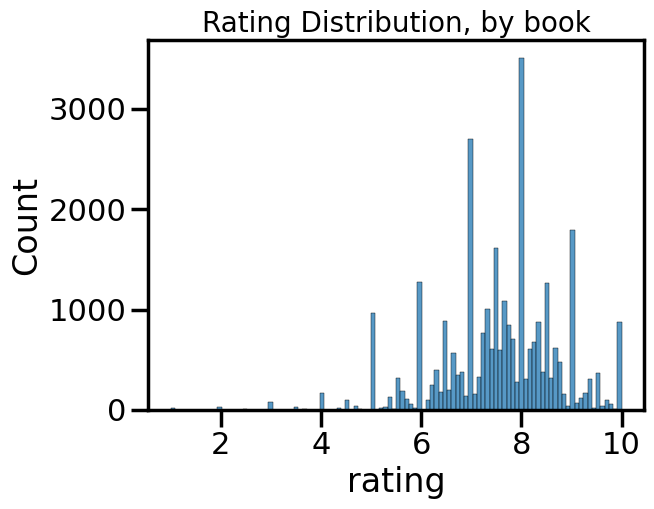

In [19]:
plt.figure()
sns.histplot(x='rating',data=df_books,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

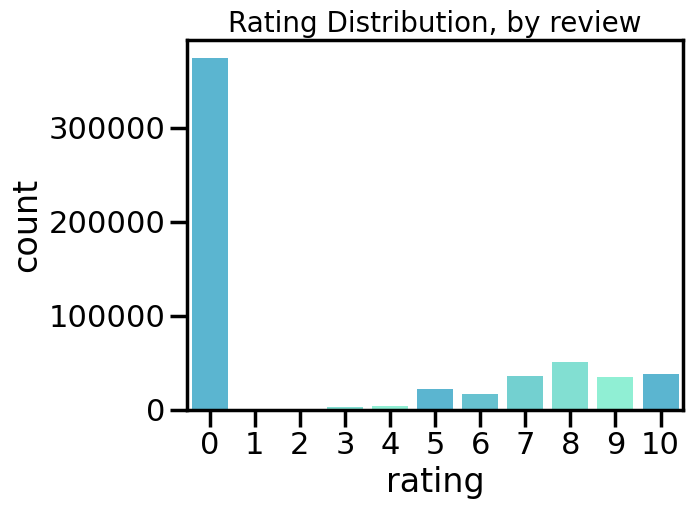

In [14]:
plt.figure()
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

In [12]:
df = zero_droper(df)

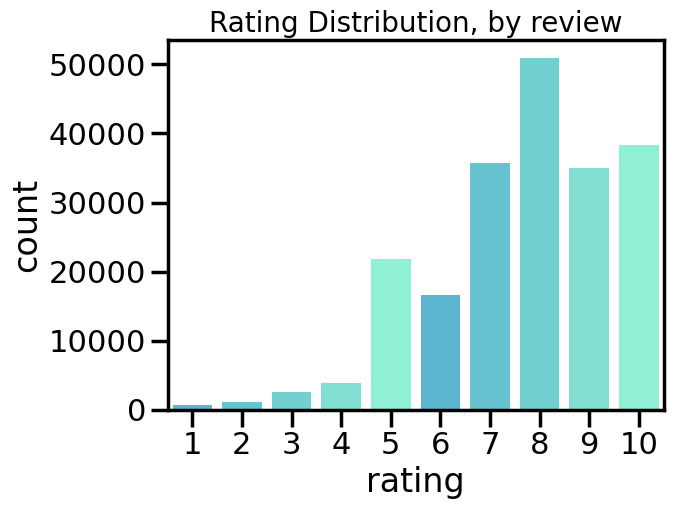

In [16]:
plt.figure()
sns.countplot(x='rating',data=df,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

### author

In [14]:


df_author = df_books_new.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'sum','sum_rating':'sum','publisher':'count'})
df_author['avg_rating'] = df_author['sum_rating']/df_author['user_id']

In [15]:
df_author['log_num_books'] = df_author['publisher'].apply(lambda num: np.log(num))
df_author['log_num_readers'] = df_author['user_id'].apply(lambda num: np.log(num))

df_author=df_author.rename(columns={'publisher':'Total_books_publised','user_id':"Total_readers"})



### with rating 0 review

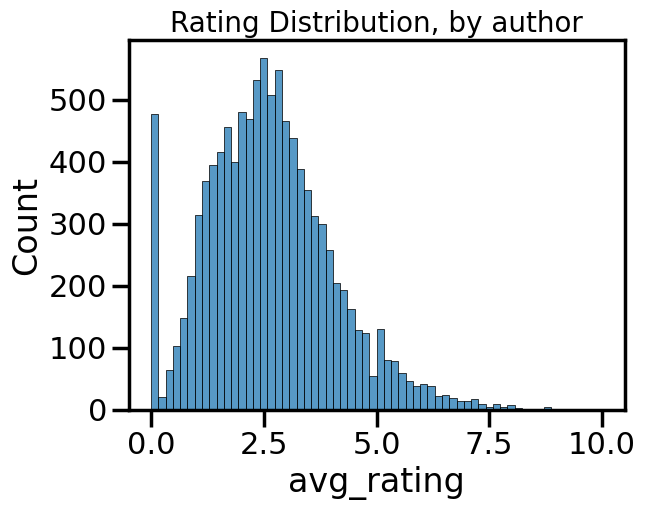

In [198]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

without 0 rating review

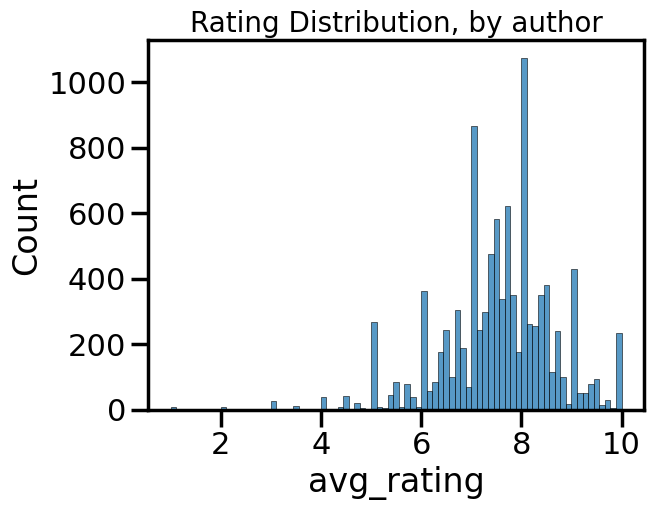

In [16]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

Text(0.5, 1.0, 'log namber of readers')

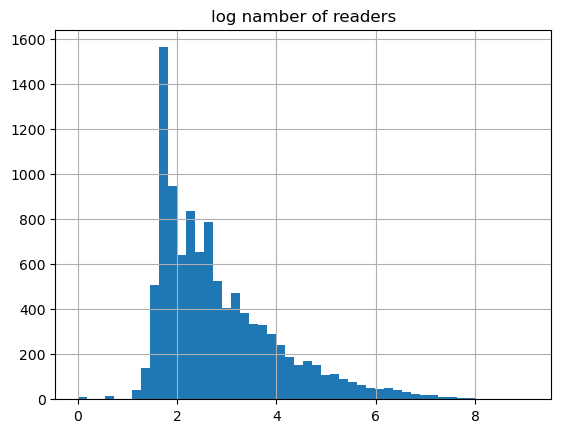

In [169]:
df_author.log_num_readers.hist(bins =50)
plt.title("log namber of readers")

Text(0.5, 1.0, 'log namber of books publish')

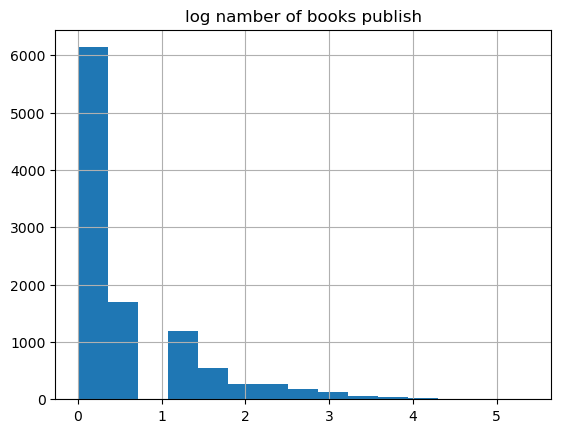

In [170]:
df_author.log_num_books.hist(bins=15)
plt.title("log namber of books publish")

In [ ]:
df_author.groupby(['user_id'])['user_id'].count().apply(lambda num: np.log(num)).hist()

<AxesSubplot:>

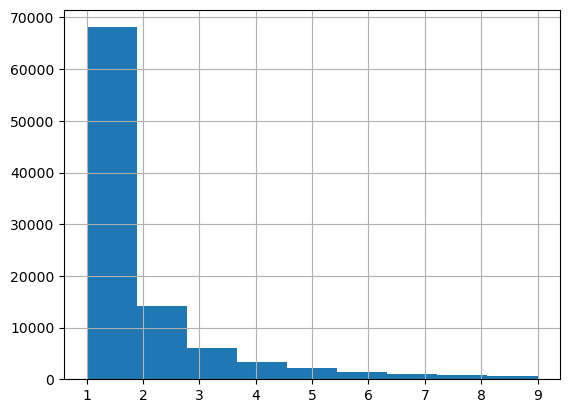

In [93]:
df_author['user_id'][df_author['user_id']<10].hist(bins=9)

<AxesSubplot:>

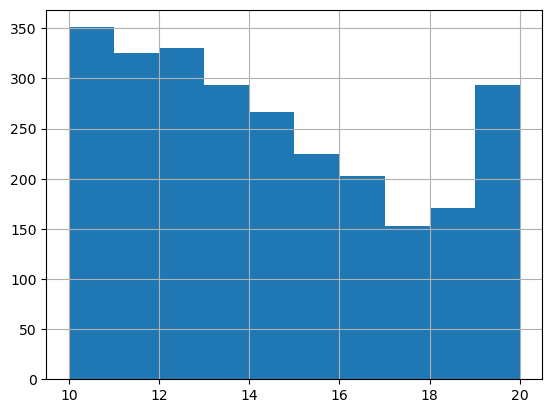

In [171]:
df_author['user_id'][df_author['user_id'].between(10,20)].hist(bins=10)

<AxesSubplot:>

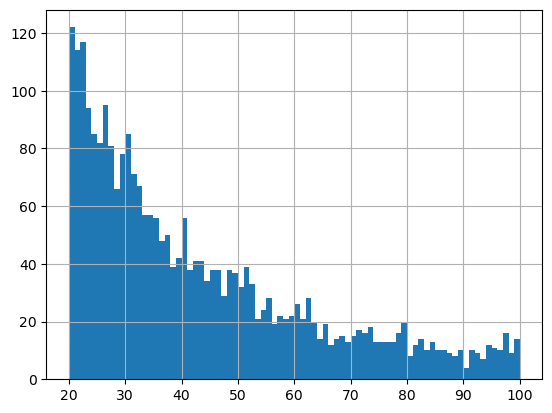

In [172]:
df_author['user_id'][df_author['user_id'].between(20,100)].hist(bins=80)

In [179]:
df_author.corr()

,Total_readers,sum_rating,Total_books_publised,avg_rating,log_num_books,log_num_readers
Total_readers,1.000000,0.971814,0.783984,0.017620,0.519879,0.563469
sum_rating,0.971814,1.000000,0.736097,0.065796,0.483059,0.535391
Total_books_publised,0.783984,0.736097,1.000000,-0.009342,0.746566,0.657801
avg_rating,0.017620,0.065796,-0.009342,1.000000,-0.024864,0.012648
log_num_books,0.519879,0.483059,0.746566,-0.024864,1.000000,0.888713
log_num_readers,0.563469,0.535391,0.657801,0.012648,0.888713,1.000000


In [180]:
df_author.describe()

,Total_readers,sum_rating,Total_books_publised,avg_rating,log_num_books,log_num_readers
count,10544.000000,10544.000000,10544.000000,10544.000000,10544.000000,10544.000000
mean,55.112955,150.888847,3.104514,2.637246,0.574115,2.848498
std,220.785515,648.595551,6.557220,1.424837,0.844846,1.194659
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7.000000,16.000000,1.000000,1.666667,0.000000,1.945910
50%,12.000000,33.000000,1.000000,2.533333,0.000000,2.484907
75%,31.000000,81.000000,3.000000,3.439268,1.098612,3.433987
max,8795.000000,31051.000000,217.000000,10.000000,5.379897,9.081939


# without 0 rating:

In [17]:
df_books = df.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books['sum_rating'] = df_books['rating']*df_books['user_id']

In [221]:
df_new_non0 = df_new[df_new['rating']!=0] 

In [222]:
df_books_new_non0 = df_new_non0.groupby('isbn').agg({'book_title':'first', 'book_author':'first', 'year_of_publication':'first',
                                           'user_id':'count','age':'mean','rating':'mean','publisher':'first',
                                           'Category':'first','img_s':'first', 'img_m':'first', 'img_l':'first',
                                           'Summary':'first','Language':'first','city':pd.Series.mode,
                                           'state':pd.Series.mode, 'country':pd.Series.mode})
df_books_new_non0['sum_rating'] = df_books_new_non0['rating']*df_books_new_non0['user_id']

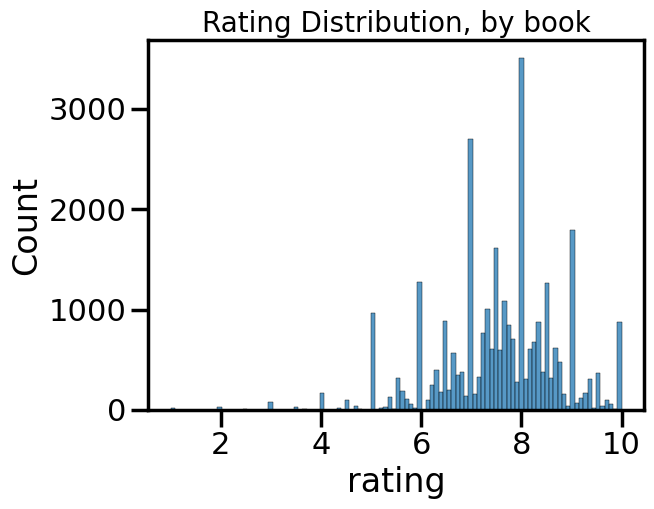

In [18]:
plt.figure()
sns.histplot(x='rating',data=df_books,palette=customPalette)
plt.title('Rating Distribution, by book',size=20)
plt.show()

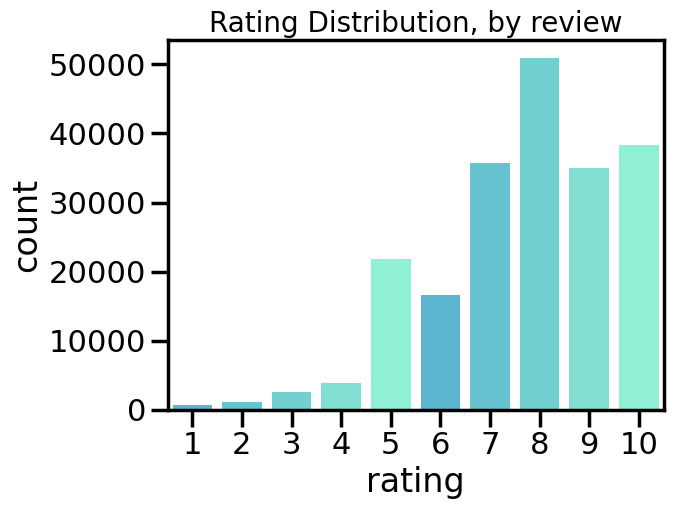

In [224]:
plt.figure()
sns.countplot(x='rating',data=df_new_non0,palette=customPalette)
plt.title('Rating Distribution, by review',size=20)
plt.show()

### author

In [225]:


df_author_non0 = df_books_new_non0.groupby('book_author').agg({'Category':pd.Series.mode,'user_id':'sum','sum_rating':'sum','publisher':'count'})
df_author_non0['avg_rating'] = df_author_non0['sum_rating']/df_author_non0['user_id']

In [227]:
df_author_non0['log_num_books'] = df_author_non0['publisher'].apply(lambda num: np.log(num))
df_author_non0['log_num_readers'] = df_author_non0['user_id'].apply(lambda num: np.log(num))

df_author_non0=df_author_non0.rename(columns={'publisher':'Total_books_publised','user_id':"Total_readers"})



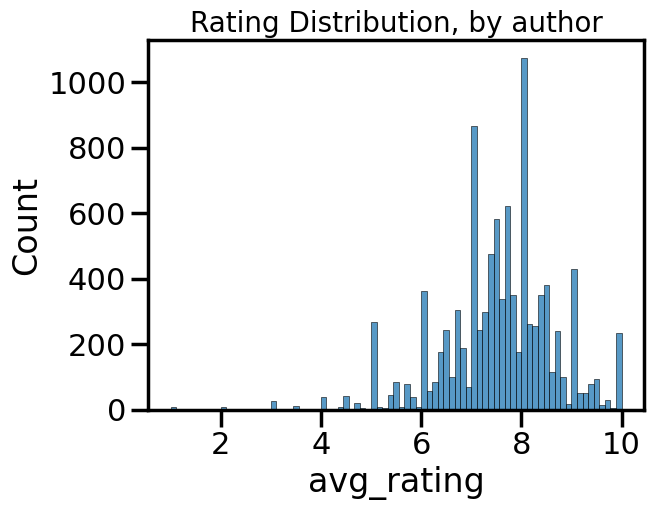

In [228]:
plt.figure()
sns.histplot(x='avg_rating',data=df_author_non0,palette=customPalette)
plt.title('Rating Distribution, by author',size=20)
plt.show()

Text(0.5, 1.0, 'log namber of readers')

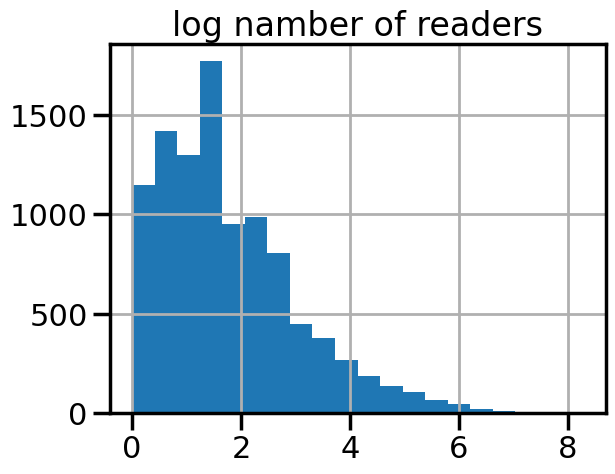

In [230]:
df_author_non0.log_num_readers.hist(bins =20)
plt.title("log namber of readers")

In [234]:
df_books_new_non0.corr()

,year_of_publication,user_id,age,rating,sum_rating
year_of_publication,1.000000,0.048244,0.063894,-0.046347,0.041468
user_id,0.048244,1.000000,-0.017594,0.056497,0.993650
age,0.063894,-0.017594,1.000000,0.003695,-0.020232
rating,-0.046347,0.056497,0.003695,1.000000,0.097156
sum_rating,0.041468,0.993650,-0.020232,0.097156,1.000000


<AxesSubplot:>

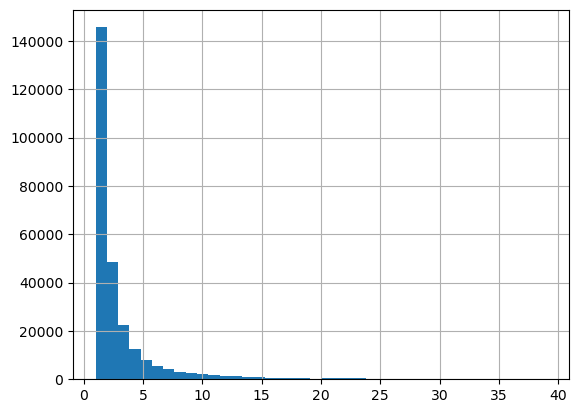

In [34]:
df_books[df_books['user_id']<40]['user_id'].hist(bins =40)

C:\Users\yotam\AppData\Local\Temp\ipykernel_16004\2551894235.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_books[df_books['user_id']>40][df_books['user_id']<300]['user_id'].hist(bins =40)


<AxesSubplot:>

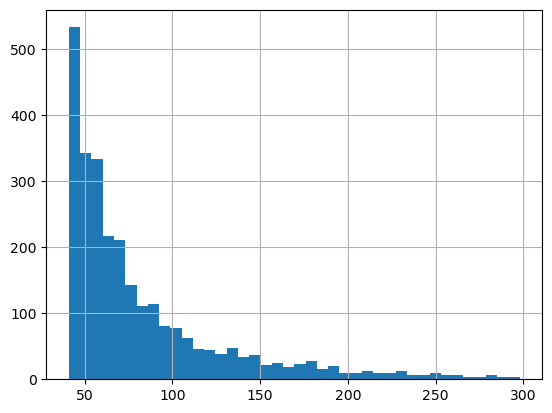

In [40]:
df_books[df_books['user_id']>40][df_books['user_id']<300]['user_id'].hist(bins =40)

<AxesSubplot:>

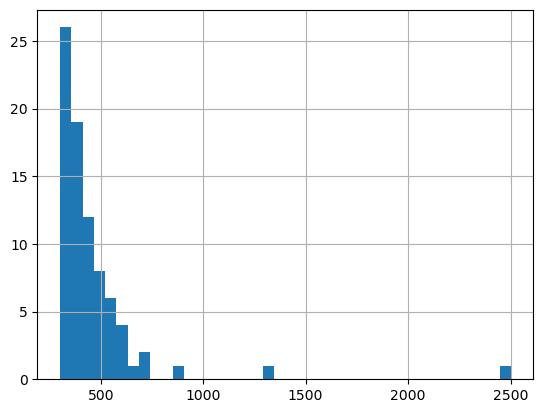

In [41]:
df_books[df_books['user_id']>300]['user_id'].hist(bins =40)

<AxesSubplot:>

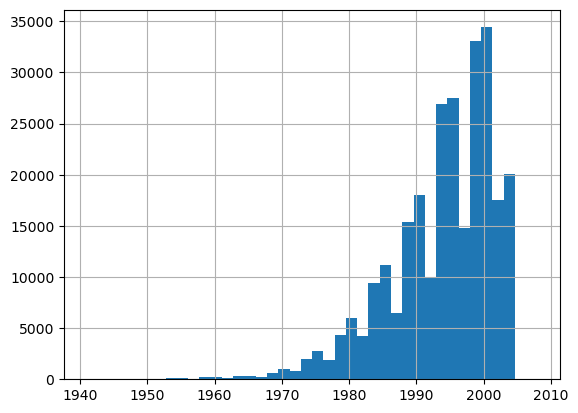

In [48]:
df_books['year_of_publication'][df_books['year_of_publication']>1940].hist(bins =40)

<AxesSubplot:>

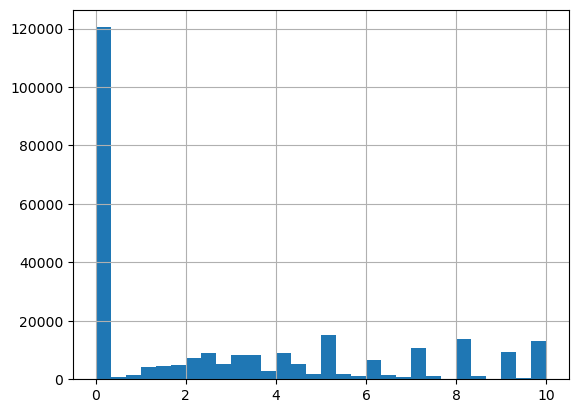

In [16]:
df_books['rating'].hist(bins=30)

In [20]:
len(df_books['rating'][df_books['rating']==0])

120328

120328 books with rating 0, out of 270170 total books

85760 of the zero books got 1 reader, 21693 got 2 reader.

In [25]:
df_books_zero = df_books[df_books['rating']==0]

<AxesSubplot:xlabel='user_id'>

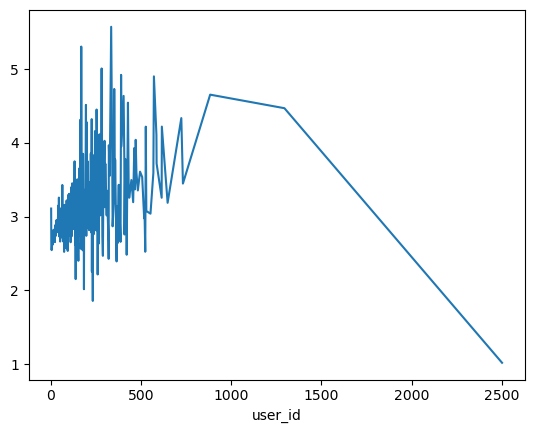

In [35]:
df_books.groupby(['user_id'])['rating'].mean().plot()

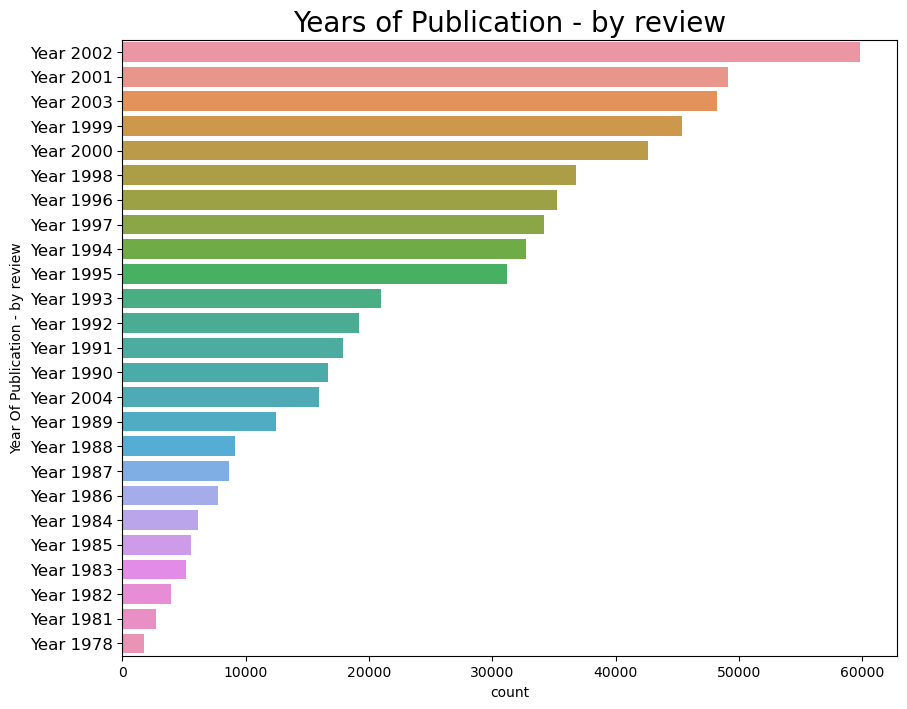

In [184]:
df_v=df_new[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication - by review')
plt.yticks(size=12)
plt.title('Years of Publication - by review',size=20)
plt.show()

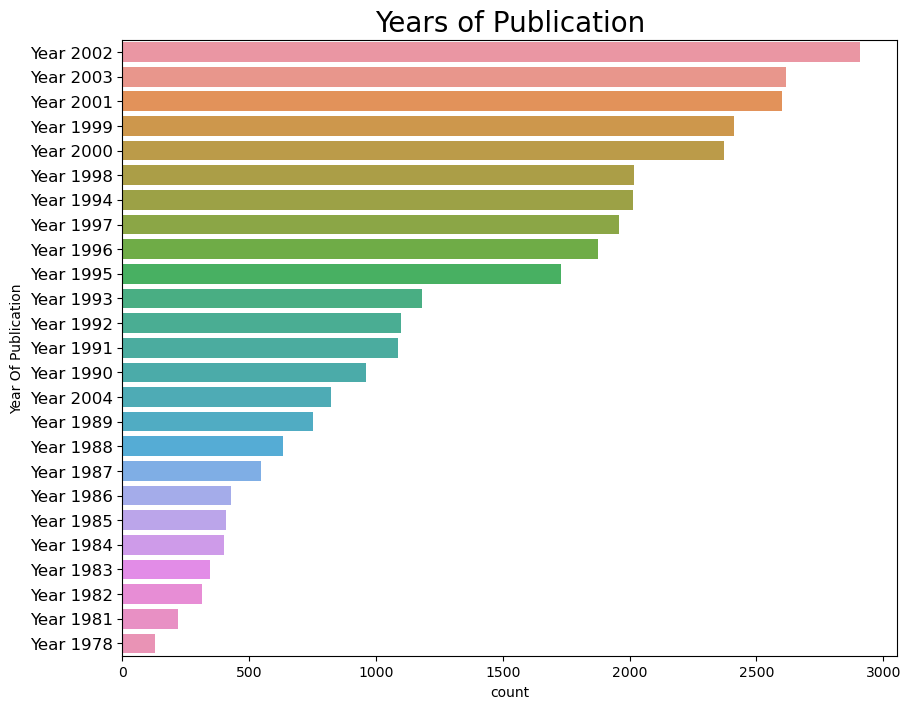

In [183]:
df_v=df_books_new[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v)#,palette=customPalette)
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

<AxesSubplot:xlabel='year_of_publication'>

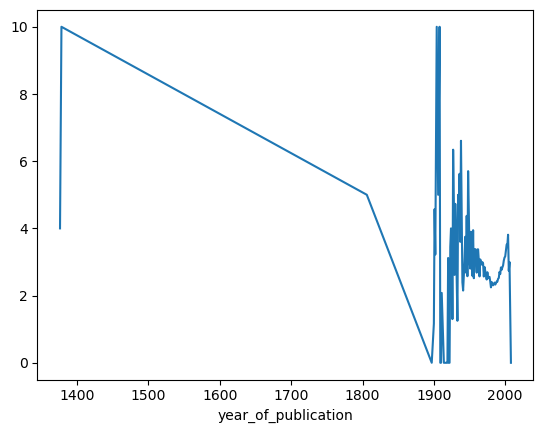

In [36]:
df_books.groupby(['year_of_publication'])['rating'].mean().plot()


In [181]:
df_books_new.year_of_publication.sort_values()

isbn
0373226888    1902.0
0684717603    1920.0
0307001342    1920.0
0307021491    1920.0
0440772435    1923.0
               ...  
0452284775    2004.0
0743246349    2004.0
0140124373    2005.0
0140622454    2005.0
1881273156    2005.0
Name: year_of_publication, Length: 32734, dtype: float64

there is 2 diffrent iranian readers that read books from years before 1800

In [65]:
df = df[df['year_of_publication']>1800]

<AxesSubplot:>

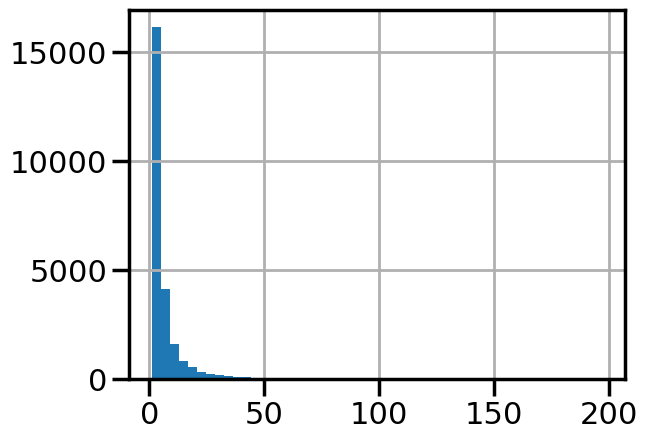

In [24]:
df.groupby(['user_id'])['user_id'].count()[df.groupby(['user_id'])['user_id'].count()<200].hist(bins=50)